In [1]:
import numpy as np

def det():
    C = np.zeros(shape=(3, 3))
    det = 0
    for i in range(3):
        for j in range(3):
            C[i][j] = (A[(i + 1) % 3][(j + 1) % 3] * A[(i + 2) % 3][(j + 2) % 3]) - (A[(i + 1) % 3][(j + 2) % 3] * A[(i + 2) % 3][(j + 1) % 3])
            if i == 0:
                det += A[i][j] * C[i][j]
    return det

def trans():
    trans = np.zeros(shape=(3, 3))
    for i in range(3):
        for j in range(3):
            trans[i][j] = (A[(i + 1) % 3][(j + 1) % 3] * A[(i + 2) % 3][(j + 2) % 3]) - (A[(i + 1) % 3][(j + 2) % 3] * A[(i + 2) % 3][(j + 1) % 3])
    return trans
    
A = np.array(
    [[1, 2, 3],
    [2, 5, 4],
    [3, 4, 7]])

det = det()
trans = trans()
inv = trans / det
I = np.matmul(A,inv)

print("Det : ",det)

print("Inverse Matrix : ")
print(inv)

print("IDENTITY MATRIX : \n",I)

Det :  -6.0
Inverse Matrix : 
[[-3.16666667  0.33333333  1.16666667]
 [ 0.33333333  0.33333333 -0.33333333]
 [ 1.16666667 -0.33333333 -0.16666667]]
IDENTITY MATRIX : 
 [[ 1.00000000e+00  5.55111512e-17  1.38777878e-16]
 [ 8.88178420e-16  1.00000000e+00  3.33066907e-16]
 [ 1.11022302e-15 -1.66533454e-16  1.00000000e+00]]


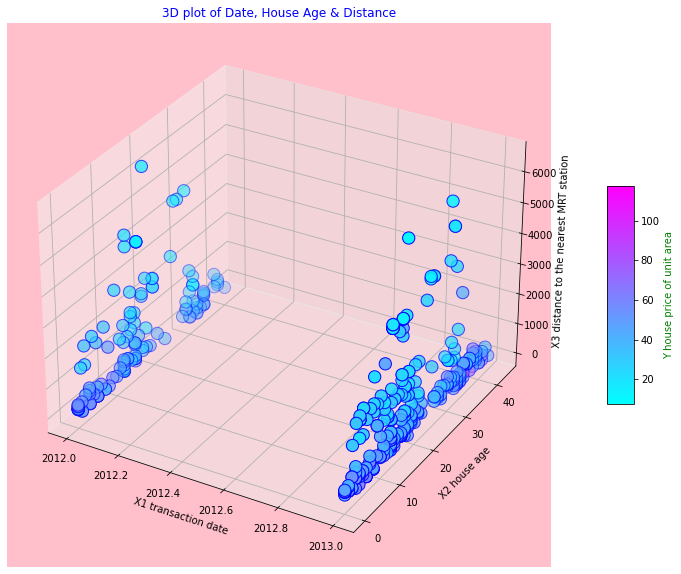

In [2]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


data=pd.read_csv("RealEstate.csv")

X1trdate = data['X1 transaction date']
X2hage = data['X2 house age']
X3distnearMRTstation = data['X3 distance to the nearest MRT station']

X1trdate.replace(regex={"a":"0","b":"1","c":"2"},inplace=True)
X2hage.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
X3distnearMRTstation.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)

data[["X1 transaction date","X2 house age","X3 distance to the nearest MRT station"]] = data[["X1 transaction date","X2 house age","X3 distance to the nearest MRT station"]].astype(int)


fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection = "3d")
plot = ax.scatter(data["X1 transaction date"], data["X2 house age"], data["X3 distance to the nearest MRT station"],linewidth = 1, edgecolor ="blue", c = data["Y house price of unit area"],s = 150,cmap = "cool")

lab = fig.colorbar(plot,shrink = .4,aspect = 8)
lab.set_label("Y house price of unit area", color = "green")

plt.title("3D plot of Date, House Age & Distance",color = "blue")
ax.set_facecolor("pink")
ax.set_xlabel("X1 transaction date")
ax.set_ylabel("X2 house age")
ax.set_zlabel("X3 distance to the nearest MRT station")
plt.show()

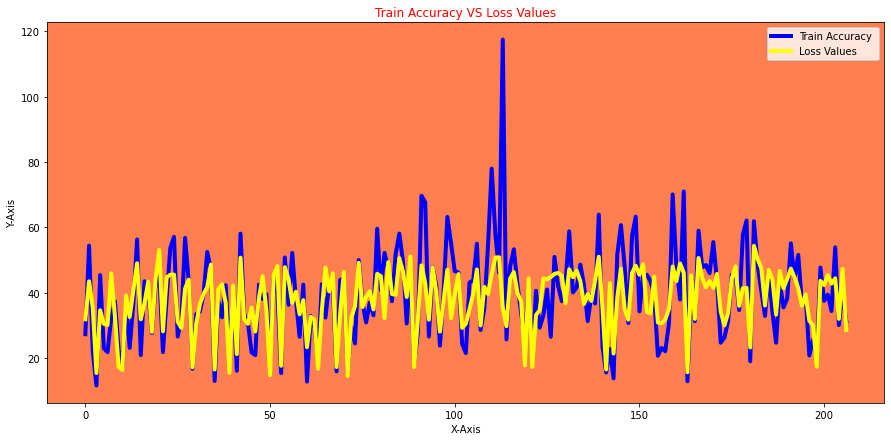

In [3]:
Yhpriceunitarea = data['Y house price of unit area']

y = Yhpriceunitarea
x = data.drop(["Y house price of unit area","X3 distance to the nearest MRT station"],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)

cv=5 
r_2 = [] 
CV = [] 

linear_regression = LinearRegression()

linear_regression.fit(x_train,y_train)
predicts = linear_regression.predict(x_test)
prediction = pd.DataFrame(predicts)
R_2 = r2_score(y_test,prediction)
cross_val = cross_val_score(linear_regression,x_train,y_train,cv=cv)

r_2.append(R_2)
CV.append(cross_val.mean())

test_index=y_test.reset_index()["Y house price of unit area"]
ax = test_index.plot(label="Train Accuracy ",figsize=(15, 7),linewidth = 4,color="blue")
ax = prediction[0].plot(label = "Loss Values",figsize=(15, 7),linewidth = 4,color="yellow")
plt.legend(loc='upper right')
ax.set_facecolor("coral")
plt.title("Train Accuracy VS Loss Values", color = "red")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()

In [4]:
def sum_ab(n, a, b, c):
    a = a - ((a*b) / n)
    return a

def mean(a, n):
    sum_a = 0.0
    for i in a:
        sum_a += i
    return (sum_a/n)

x1 = data['X1 transaction date']
x2 = data['X2 house age']
y = data['X3 distance to the nearest MRT station']
    
x1x1 = 0
x2x2 = 0
x1y = 0
x2y = 0
x1x2 = 0
sum_x1 = 0
sum_x2 = 0
sum_y = 0
    
n = len(x1)
    
for i in range(n):
    x1x1 = x1x1 + x1[i] * x1[i]
    x2x2 = x2x2 + x2[i] * x2[i]
    x1y = x1y + x1[i] * y[i]
    x2y = x2y + x2[i] * y[i]
    x1x2 = x1x2 + x1[i] * x2[i]
    
    sum_x1 = sum_x1 + x1[i]
    sum_x2 = sum_x2 + x2[i]
    sum_y2 = sum_y + y[i]
        
x1x1 = sum_ab(n,x1x1,sum_x1,sum_x1)
x2x2 = sum_ab(n,x2x2,sum_x2,sum_x2)
x1y = sum_ab(n,x1y,sum_x1,sum_y)
x2y = sum_ab(n,x2y,sum_x2,sum_y)
x1x2 = sum_ab(n,x1x2,sum_x1,sum_x2)

b1 = ( (x2x2 * x1y) - (x1x2 * x2y) ) / (x1x1 * x2x2 - x1x2 * x1x2)
b2 = ( (x1x1 * x2y) - (x1x2 * x1y) ) / (x1x1 * x2x2 - x1x2 * x1x2)
b0 = (sum_y / n) - (b1 * (sum_x1 / n)) - (b2 * (sum_x2 / n))
    
print(f'B0: {b0}, B1: {b1}, B2: {b2}')


a1 = data['X1 transaction date']
a2 = data['X3 distance to the nearest MRT station']

n = len(a1)
x_bar = mean(a1, n)
y_bar = mean(a2, len(a2))

x=0
y=0
x2=0
y2=0
xx_bar=0
yy_bar=0
xy_bar=0

def calc(n, a, b):
    for i in range(0, n, 1):
        a += b[i]
        return a
    
x = calc(n, x, a1)
y = calc(n, y, a2)

def calc2(n, a, b):
    for i in range(0, n, 1):
        a += b[i]*b[i]
        return a
    
x2 = calc2(n, x2, a1)
y2 = calc2(n, y2, a2)
    
def calc3(n, a, b, c):
    for i in range(0, n, 1):
        a += (b[i] - c) * (b[i] - c)
        return a

xx_bar = calc3(n, xx_bar, a1, x_bar)
yy_bar = calc3(n, y_bar, a2, y_bar)
xy_bar += (a1[i] - x_bar) * (a2[i] - y_bar)

slope  = xy_bar / xx_bar
intercept = y_bar - slope * x_bar;    

print(f'Slope: {slope}')

print(f'Intercept: {intercept}')

p = 0
q = 0

for i in range(0,n,1):
    fit = slope*a1[i] + intercept
    p += (fit - a2[i]) * (fit - a2[i])
    q += (fit - y_bar) * (fit - y_bar)

degreesOfFreedom = n-2
reg = q / yy_bar

m  = p / degreesOfFreedom
l = m / xx_bar
k = m /n + x_bar*x_bar*l

print(f'Regression: {reg}')

y_pred = linear_regression.predict(x_test)

mae=metrics.mean_absolute_error(y_test,y_pred)
msc=metrics.mean_squared_error(y_test,y_pred)

r2 =metrics.r2_score(y_test,y_pred)

print("The model Performance for testing set: ")
print('MAE is %.2f'% mae)
print('MSE is %.2f'% msc)
print('R2 score is %.2f'% r2)

B0: -1080.420527643083, B1: 0.5394413473346871, B2: -0.30711564051901424
Slope: -624.7408854168189
Intercept: 1258496.6406253064
Regression: 34.21631034437386
The model Performance for testing set: 
MAE is 7.06
MSE is 106.15
R2 score is 0.49


<ipython-input-4-e1daa40dd838>:2: RuntimeWarning: overflow encountered in long_scalars
  a = a - ((a*b) / n)


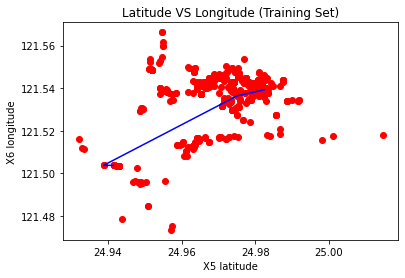

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('RealEstate.csv')
x = dataset[['X5 latitude']]
y = dataset[['X6 longitude']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.99, random_state = 130)

plt.scatter(x, y, color ='red')
plt.plot(x_train, y_train, color ='blue')
plt.title('Latitude VS Longitude (Training Set)')
plt.xlabel('X5 latitude')
plt.ylabel('X6 longitude')
plt.show()

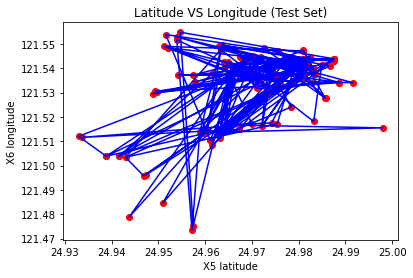

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('RealEstate.csv')
x = dataset[['X5 latitude']]
y = dataset[['X6 longitude']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 130)

plt.scatter(x_test, y_test, color ='red')
plt.plot(x_test, y_test, color ='blue')
plt.title('Latitude VS Longitude (Test Set)')
plt.xlabel('X5 latitude')
plt.ylabel('X6 longitude')
plt.show()